In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from textwrap import wrap

# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)
plt.rc('axes', titlesize=BIG_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=MEDIUM_SIZE)
plt.rc('ytick', labelsize=MEDIUM_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

In [ ]:
df=pd.read_csv("unnati_phase1_data_revised.csv")
df.shape

(21325, 7)

In [ ]:
df.head()

Alert        Date      Time        Lat       Long  Vehicle  Speed
0  cas_ldw  2022-06-01  05:36:36  12.887403  80.083412     2846     48
1  cas_ldw  2022-06-01  05:36:47  12.892586  80.085794     2846     58
2  cas_ldw  2022-06-01  05:37:04  12.894932  80.087564     2846     57
3  cas_ldw  2022-06-01  05:37:31  12.898267  80.090062     2846     49
4  cas_ldw  2022-06-01  05:38:08  12.901594  80.092538     2846     58

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(20936, 7)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20936 entries, 0 to 21324
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Alert    20936 non-null  object 
 1   Date     20936 non-null  object 
 2   Time     20936 non-null  object 
 3   Lat      20936 non-null  float64
 4   Long     20936 non-null  float64
 5   Vehicle  20936 non-null  int64  
 6   Speed    20936 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
df.describe().transpose()

count         mean          std         min         25%  \
Lat      20936.0    12.899010     0.147736   12.338685   12.847210   
Long     20936.0    80.117408     0.107560   79.774120   80.063623   
Vehicle  20936.0  2910.994794  1741.727239  805.000000  805.000000   
Speed    20936.0    38.649933    16.795099    0.000000   27.000000   

                 50%          75%          max  
Lat        12.941178    13.006704    13.182797  
Long       80.128799    80.204168    80.316079  
Vehicle  2846.000000  5339.000000  5339.000000  
Speed      42.000000    54.000000    65.000000

In [ ]:
print("column names of train dataframe:", df.columns)

column names of train dataframe: Index(['Alert', 'Date', 'Time', 'Lat', 'Long', 'Vehicle', 'Speed'], dtype='object')


In [ ]:
lat_max = df.Lat.max()
lat_min = df.Lat.min()
print("Range of latitude:", lat_max, lat_min)
lon_max = df.Long.max()
lon_min = df.Long.min()
print("Range of longitude:", lon_max, lon_min)

Range of latitude: 13.182797 12.338685
Range of longitude: 80.316079 79.77412


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20936 entries, 0 to 21324
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Alert    20936 non-null  object 
 1   Date     20936 non-null  object 
 2   Time     20936 non-null  object 
 3   Lat      20936 non-null  float64
 4   Long     20936 non-null  float64
 5   Vehicle  20936 non-null  int64  
 6   Speed    20936 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
df.describe().transpose()

count         mean          std         min         25%  \
Lat      20936.0    12.899010     0.147736   12.338685   12.847210   
Long     20936.0    80.117408     0.107560   79.774120   80.063623   
Vehicle  20936.0  2910.994794  1741.727239  805.000000  805.000000   
Speed    20936.0    38.649933    16.795099    0.000000   27.000000   

                 50%          75%          max  
Lat        12.941178    13.006704    13.182797  
Long       80.128799    80.204168    80.316079  
Vehicle  2846.000000  5339.000000  5339.000000  
Speed      42.000000    54.000000    65.000000

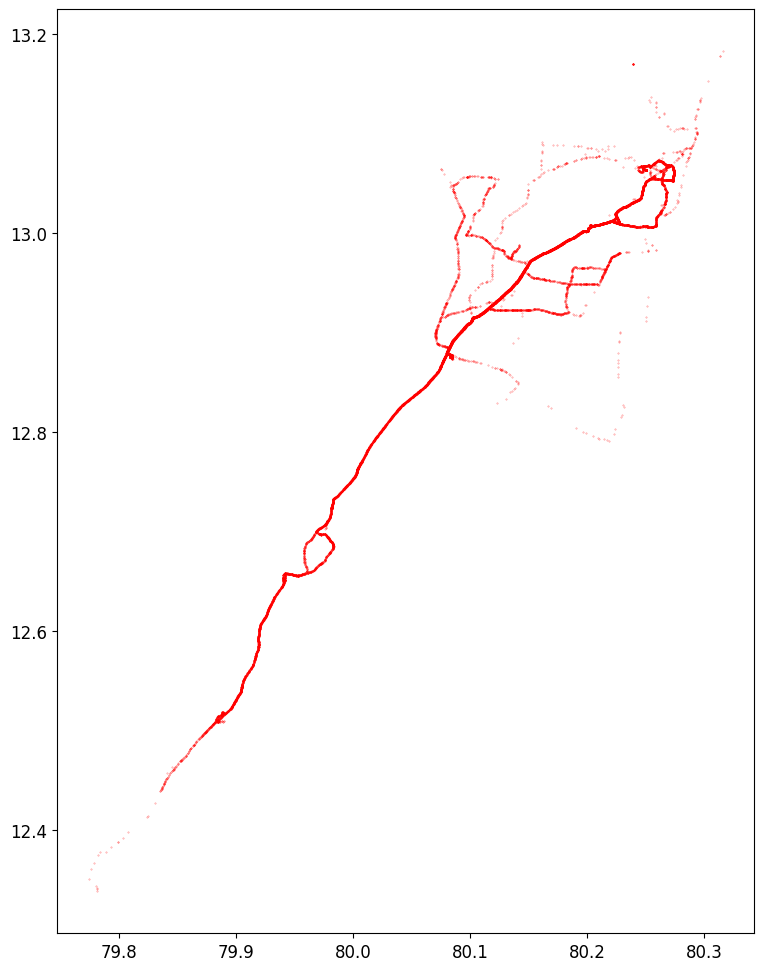

In [ ]:
fig, axes = plt.subplots(figsize=(9,12))
axes.scatter(df.Long, df.Lat, s=0.1, alpha=0.5, c='r')
plt.show()

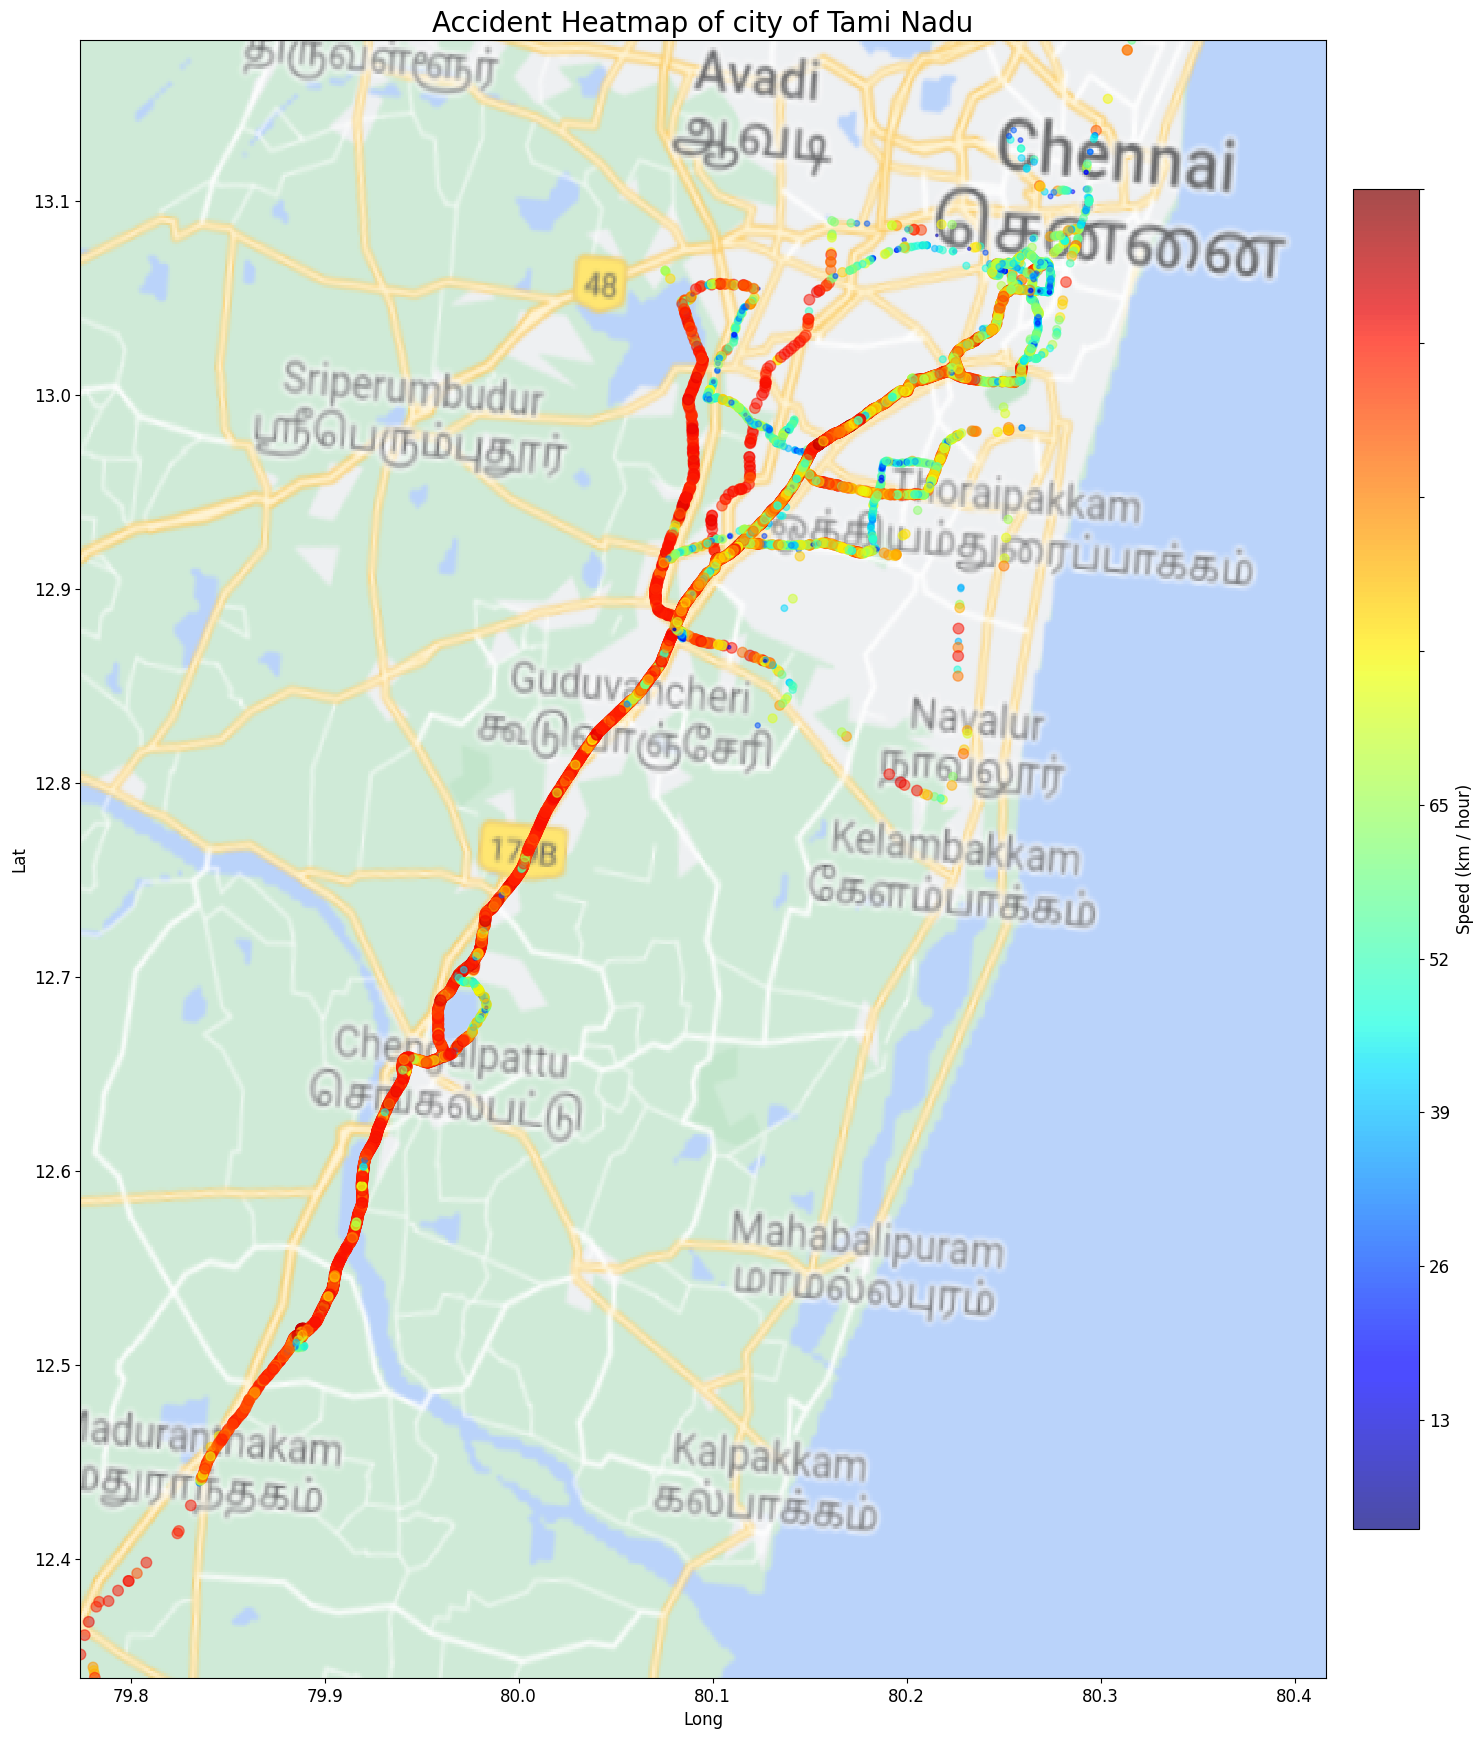

In [ ]:
tamil_map_img = 'Screenshot (365).png'
tamil_map = plt.imread(tamil_map_img)
cmap = plt.get_cmap("jet")

axes = df.plot(figsize=(15,20), kind='scatter',
                    x='Long', y='Lat',
                    alpha=0.5, marker="o", s=df["Speed"],
                    c=df["Speed"], cmap=cmap,
                    colorbar=False)

epsilon = 0.04
bound_box = [lon_min  , lon_max +0.1,
             lat_min  , lat_max ]
im = plt.imshow(tamil_map, extent=bound_box, zorder=0,
           cmap=cmap, interpolation='nearest', alpha=0.7)

axes.set_ylabel("Lat")
axes.set_xlabel("Long")
axes.set_title('Accident Heatmap of city of Tami Nadu')

# Colorbar
speed = df["Speed"].values
tick_values = np.linspace(speed.min(), speed.max(), num=6, dtype=np.int64)

cbar = plt.colorbar(im, fraction=0.05, pad=0.02)
cbar.set_label("Speed (km / hour)")
cbar.ax.set_yticklabels(["%d"%(val) for val in tick_values])

plt.tight_layout()


plt.show()

In [ ]:
unique_data = df['Vehicle'].unique()
print("Number of unique devices used in buses =", len(unique_data))

Number of unique devices used in buses = 5


#LOOK FOR THIS LATER

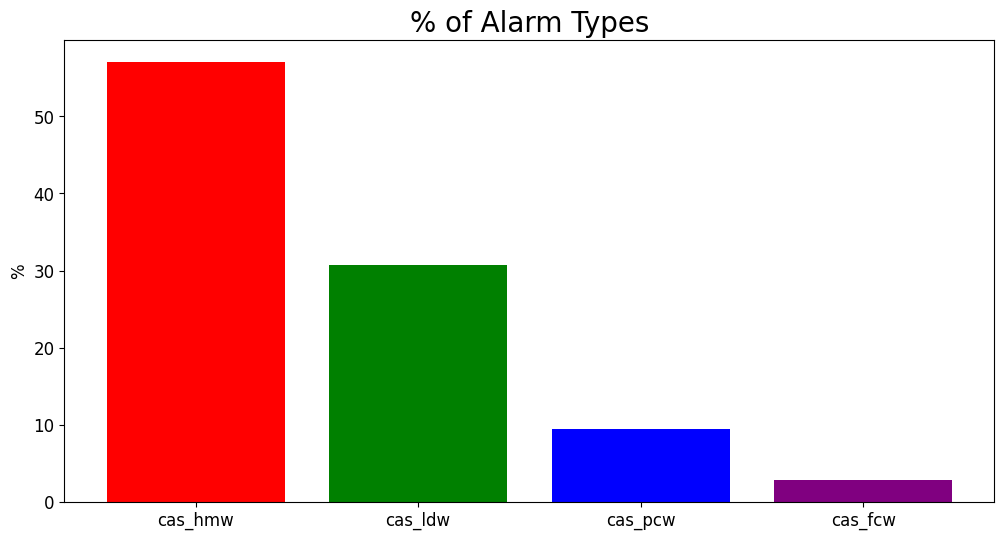

In [ ]:
my_colors = ['red', 'green', 'blue', 'purple', 'orange']
fig, axes = plt.subplots(figsize=(12,6))
data = df['Alert'].value_counts(normalize=True)
axes.bar(data.index, data*100, color=my_colors)
axes.set_title('% of Alarm Types')
axes.set_xlabel('')
axes.set_ylabel('%')
plt.show()

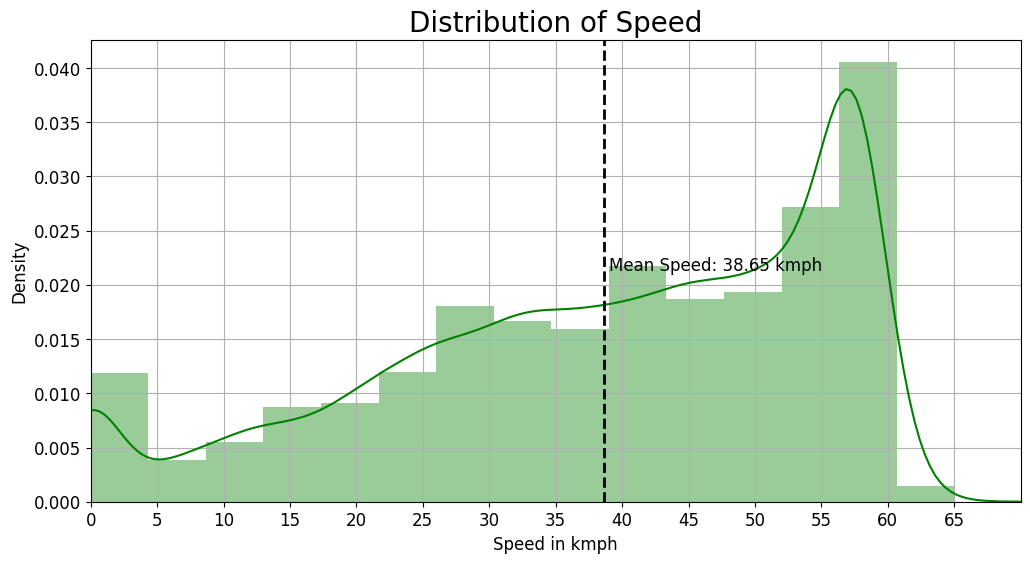

In [ ]:
fig, axes = plt.subplots(figsize=(12,6))
data = df['Speed']
sns.distplot(data, bins=15, color='green')
axes.axvline(data.mean(), color='k', linestyle='dashed', linewidth=2)

axes.set_xticks(np.arange(0, data.max()+5, 5))
axes.set_xticklabels([str(val) for val in np.arange(0, data.max()+5, 5)])
axes.set_xlim(0, data.max()+5)
axes.set_xlabel('Speed in kmph')
axes.set_title('Distribution of Speed')
axes.grid(True)

_ymin, _ymax = axes.get_ylim()
axes.text(data.mean() + data.mean()/100,
          (_ymax+_ymin)*0.5,
          'Mean Speed: {:.2f} kmph'.format(data.mean()))

plt.show()

In [ ]:
df.Date = df.Date.map(lambda x : pd.Timestamp(x, tz='Asia/Kolkata'))
df.Time = df.Time.map(lambda x : pd.Timestamp(x, tz='Asia/Kolkata'))

In [ ]:
print("Alarm data are spanning across:")
print("Years: ", df.Date.dt.year.unique())
print("Months: ", df.Date.dt.month_name().unique())
print("Dates: ", df.Date.dt.day.unique())

Alarm data are spanning across:
Years:  [2022]
Months:  ['June' 'July' 'August']
Dates:  [ 1  2  3  4  6  7  8  9 10 11 13 14 15 16 17 20 21 22 23 24 25 27 28 29
 30  5 12 18 19 26 31]


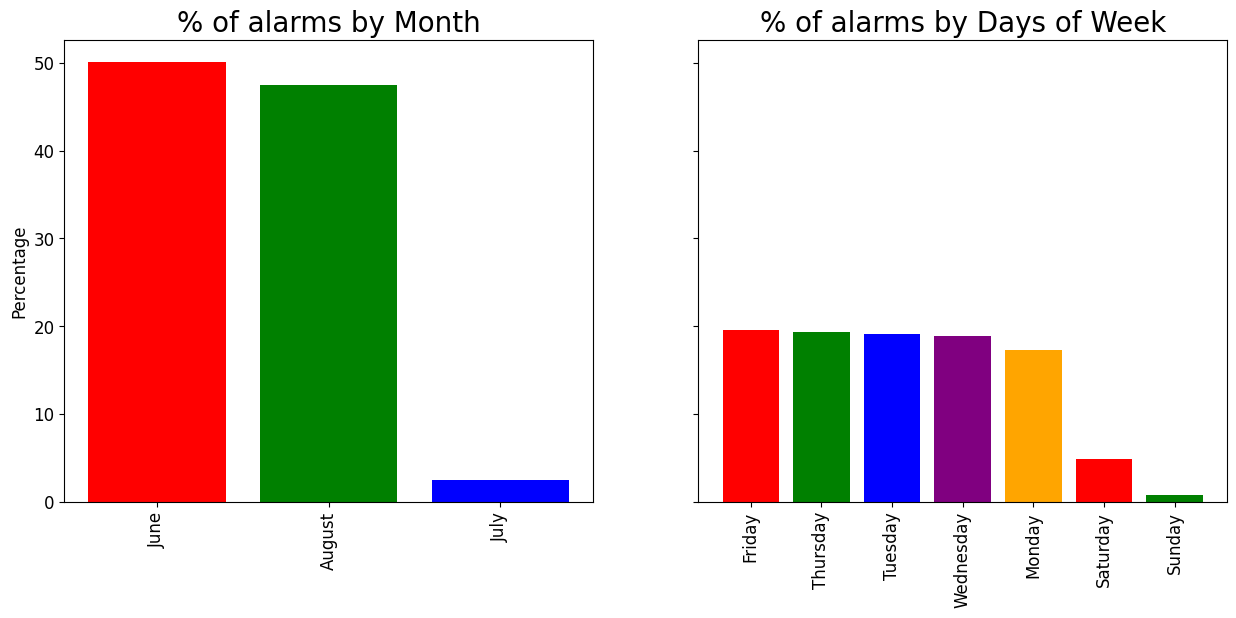

In [ ]:

fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df["monthName"] = df.Date.dt.month_name()
data = df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of alarms by Month')

df["dayName"] = df.Date.dt.day_name()
data = df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of alarms by Days of Week')

plt.show()

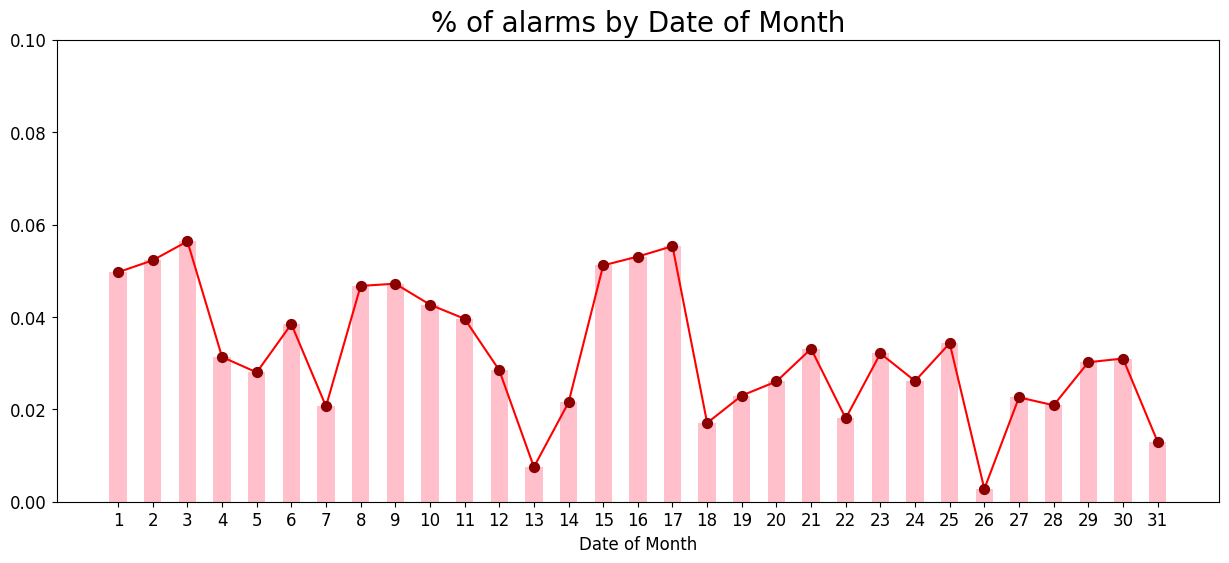

In [ ]:
fig, axes = plt.subplots(figsize=(15,6))
df["dayOfMonth"] = df.Date.dt.day
data = df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of alarms by Date of Month')

plt.show()

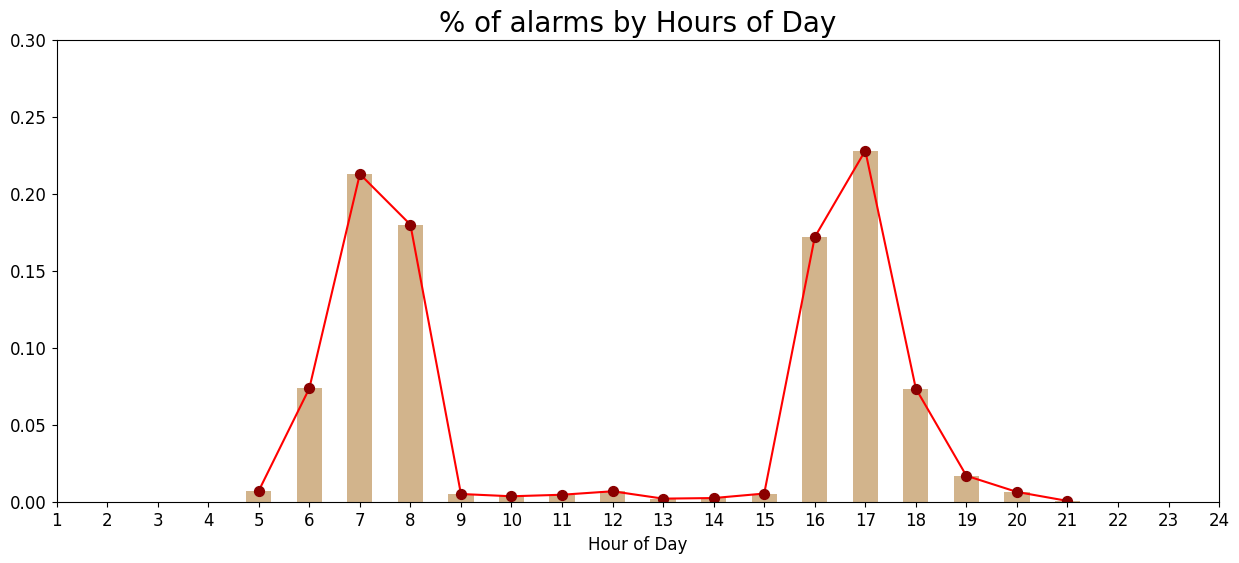

In [ ]:
fig, axes = plt.subplots(figsize=(15,6))
df["hour"] = df.Time.dt.hour
data = df["hour"].value_counts(normalize=True).sort_index()

axes.bar(data.index, data, color='tan', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Hour of Day')
axes.set_xticks(np.arange(1, 25))
axes.set_xticklabels([str(val) for val in np.arange(1, 25)])
axes.set_ylim(0, 0.3)
axes.set_title('% of alarms by Hours of Day')

plt.show()

In [ ]:
# Seggregate data by alarm types
data_lscw = df[df.Alert == 'cas_hmw']
data_hscw = df[df.Alert == 'cas_idw']
data_speed = df[df.Alert == 'cas_pcw']
data_pcw = df[df.Alert == 'cas_fcw' ]

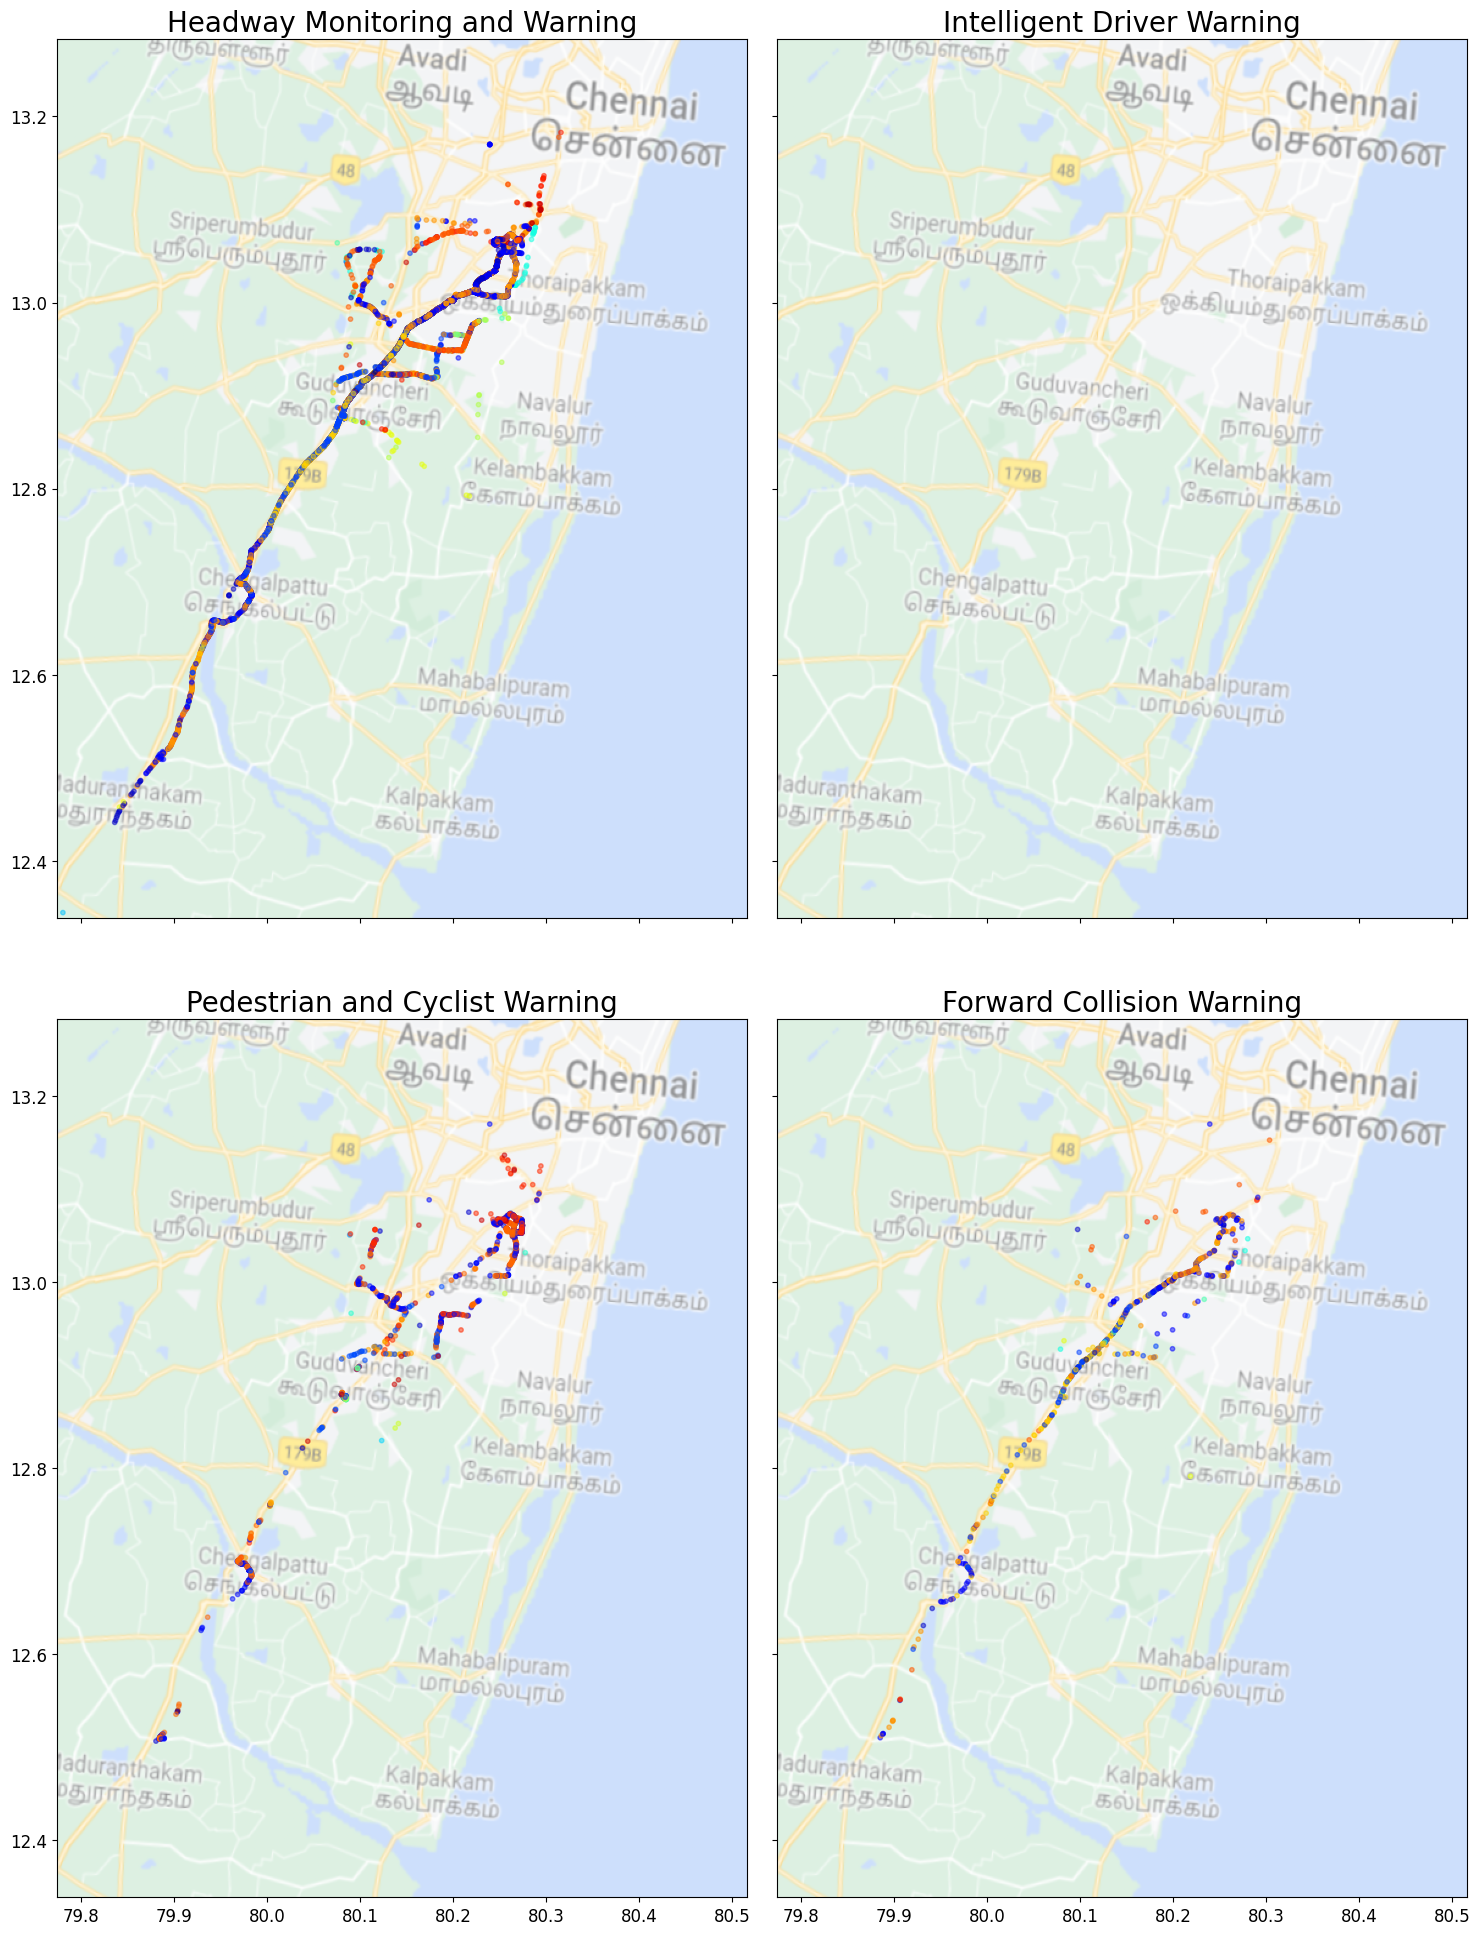

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,20), sharex=True, sharey=True)
cmap = plt.get_cmap("jet")

# Plot HMW
axes[0][0].scatter(data_lscw.Long, data_lscw.Lat,
                   alpha=0.5, marker="o", s=10,
                   c=data_lscw.hour, cmap=cmap, zorder=1)
axes[0][0].set_title("Headway Monitoring and Warning")

# Plot IDW
axes[0][1].scatter(data_hscw.Long, data_hscw.Lat,
                   alpha=0.5, marker="o", s=10,
                   c=data_hscw.hour, cmap=cmap, zorder=1)
axes[0][1].set_title("Intelligent Driver Warning")

# Plot PCW
axes[1][0].scatter(data_speed.Long, data_speed.Lat,
                   alpha=0.5, marker="o", s=10,
                   c=data_speed.hour, cmap=cmap, zorder=1)
axes[1][0].set_title("Pedestrian and Cyclist Warning")

# Plot FCW
axes[1][1].scatter(data_pcw.Long, data_pcw.Lat,
                   alpha=0.5, marker="o", s=10,
                   c=data_pcw.hour, cmap=cmap, zorder=1)
axes[1][1].set_title("Forward Collision Warning")

# Plot Tamil map image
epsilon = 0.01
bound_box = [lon_min  , lon_max +0.2,
             lat_min , lat_max +0.1]

for ax in axes.flat:
    im = ax.imshow(tamil_map, extent=bound_box,
                      alpha=0.5, zorder=0, cmap=cmap)

plt.tight_layout()
plt.show()

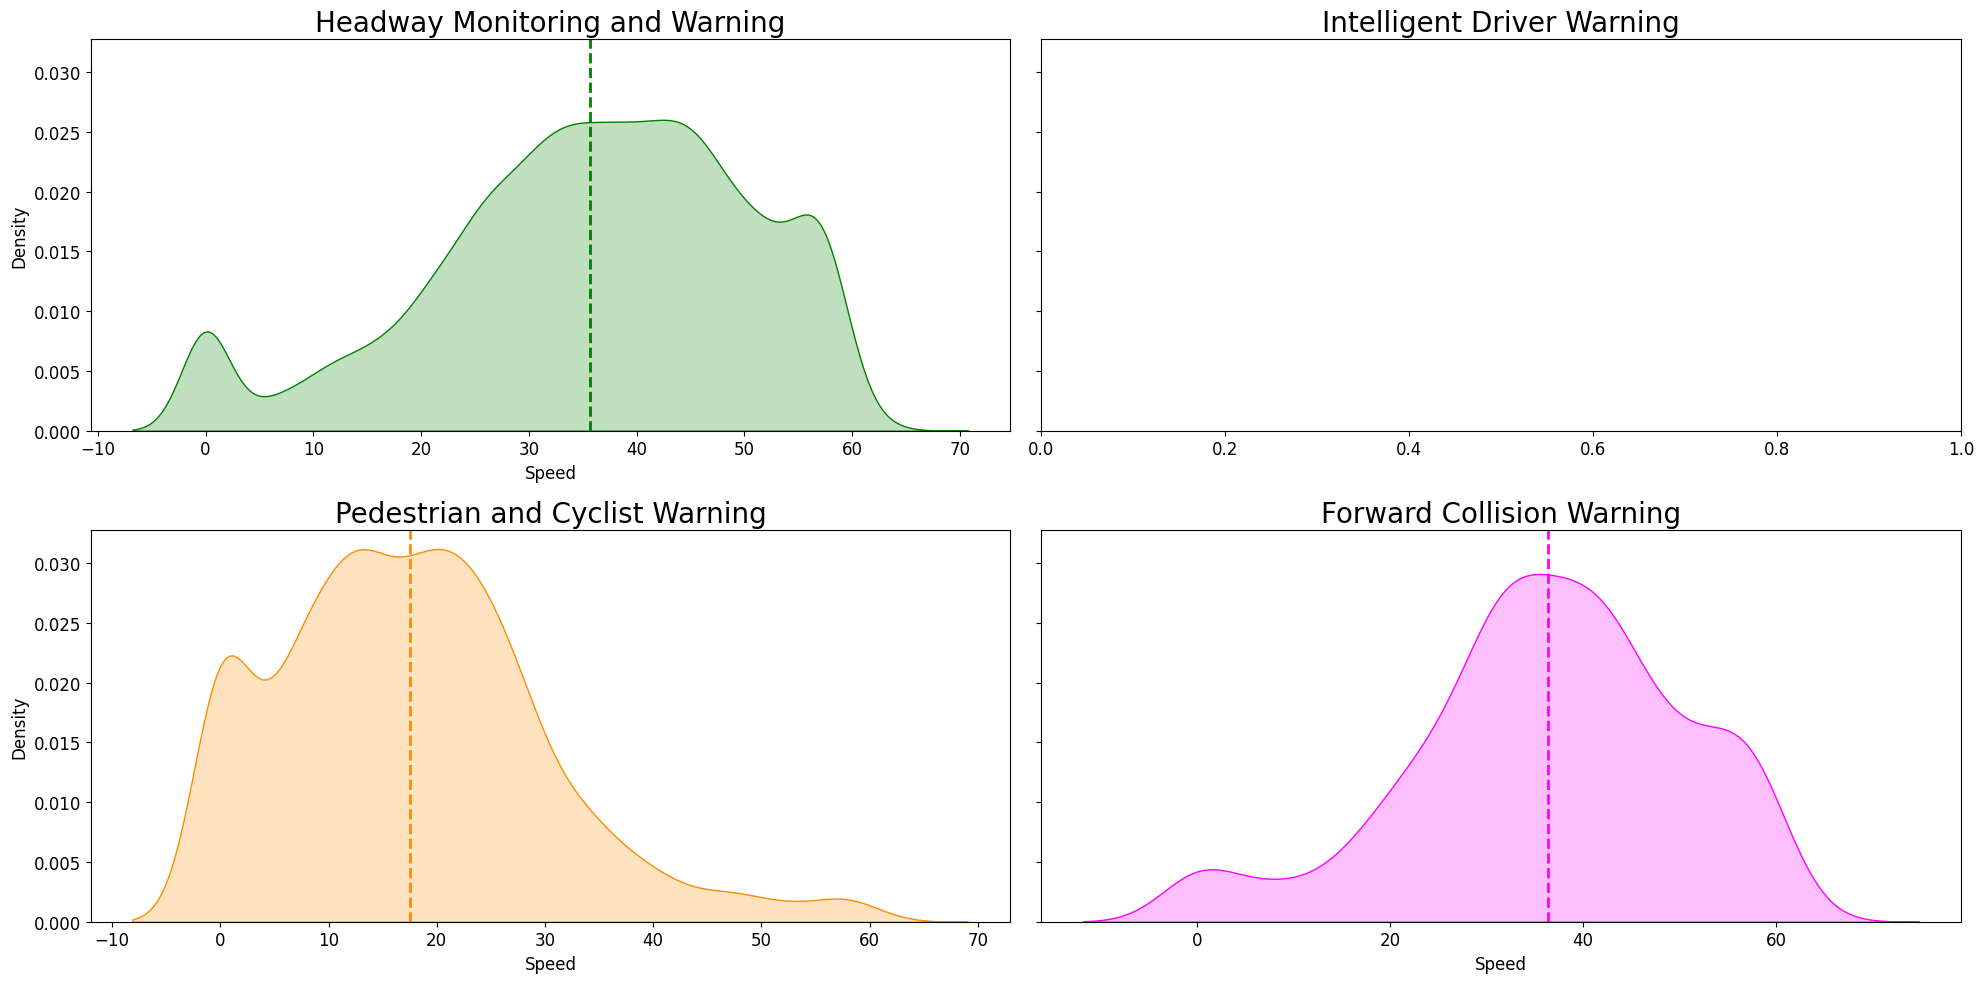

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,10), sharey=True)

# HMW
sns.kdeplot(data_lscw.Speed, color='green', shade=True, ax=axes[0][0])
axes[0][0].axvline(data_lscw.Speed.mean(), color='green', linestyle='dashed', linewidth=2)
axes[0][0].set_title('Headway Monitoring and Warning')

# IDW
sns.kdeplot(data_hscw.Speed, color='red', shade=True, ax=axes[0][1])
axes[0][1].axvline(data_hscw.Speed.mean(), color='red', linestyle='dashed', linewidth=2)
axes[0][1].set_title('Intelligent Driver Warning')

# PCW
sns.kdeplot(data_speed.Speed, color='darkorange', shade=True, ax=axes[1][0])
axes[1][0].axvline(data_speed.Speed.mean(), color='darkorange', linestyle='dashed', linewidth=2)
axes[1][0].set_title('Pedestrian and Cyclist Warning')

# FCW
sns.kdeplot(data_pcw.Speed, color='magenta', shade=True, ax=axes[1][1])
axes[1][1].axvline(data_pcw.Speed.mean(), color='magenta', linestyle='dashed', linewidth=2)
axes[1][1].set_title('Forward Collision Warning')

plt.tight_layout()
plt.show()

In [ ]:
pip install geojson

In [ ]:
bbmp_data = pd.read_csv("IN.csv")
bbmp_data.sample(5)

WARD_NO           WARD_NAME  latitude  longitude
598   636004          Alagapuram   11.8833    78.9167
569   635107         Denkanikota   12.5333    77.8000
702   641001          Devangapet   10.9375    76.9750
343   624610  Balasamudram (Ddl)   10.5333    78.0667
742   643005          Indu Nagar   11.4611    76.5500

In [ ]:
# Capitalize ward name
bbmp_data['WARD_NAME'] = bbmp_data['WARD_NAME'].str.capitalize()
print("Total number of wards in BBMP dataset:", len(bbmp_data['WARD_NO'].unique()))

# Create a dict mapping of ward number and names
ward_numbers = bbmp_data['WARD_NO'].unique()
ward_names = bbmp_data['WARD_NAME'].unique()
ward_dict = dict(zip(ward_numbers, ward_names))

Total number of wards in BBMP dataset: 758


In [ ]:


# Read the first dataset into a Pandas DataFrame
df1 = pd.read_csv("unnati_phase1_data_revised.csv")

# Read the second dataset into a Pandas DataFrame
df2 = pd.read_csv("IN.csv")

# Create a function to find the closest ward for a given latitude and longitude
def find_closest_ward(latitude, longitude):
  """
  Finds the closest ward for a given latitude and longitude.

  Args:
    latitude: The latitude coordinate.
    longitude: The longitude coordinate.

  Returns:
    The name of the closest ward.
  """

  # Calculate the distance between the given point and all the points in the second dataset
  distances = np.sqrt(((df2["latitude"] - latitude)**2) + ((df2["longitude"] - longitude)**2))

  # Find the index of the point with the minimum distance
  closest_ward_index = distances.argmin()

  # Return the name of the closest ward
  return df2["WARD_NAME"][closest_ward_index]

# Find the closest ward for each point in the first dataset
df1["ward"] = df1.apply(lambda row: find_closest_ward(row["Lat"], row["Long"]), axis=1)

# Print the results
print(df1)


         Alert        Date      Time        Lat       Long  Vehicle  Speed  \
0      cas_ldw  2022-06-01  05:36:36  12.887403  80.083412     2846     48   
1      cas_ldw  2022-06-01  05:36:47  12.892586  80.085794     2846     58   
2      cas_ldw  2022-06-01  05:37:04  12.894932  80.087564     2846     57   
3      cas_ldw  2022-06-01  05:37:31  12.898267  80.090062     2846     49   
4      cas_ldw  2022-06-01  05:38:08  12.901594  80.092538     2846     58   
...        ...         ...       ...        ...        ...      ...    ...   
21320  cas_pcw  2022-08-31  18:12:29  13.070668  80.265539     5339     30   
21321  cas_pcw  2022-08-31  18:13:01  13.071554  80.264616     5339     34   
21322  cas_hmw  2022-08-31  18:15:05  13.071181  80.258729     5339     24   
21323  cas_pcw  2022-08-31  18:16:35  13.067723  80.255065     5339     23   
21324  cas_hmw  2022-08-31  18:19:23  13.065917  80.247777     5339     22   

             ward  
0      Madipakkam  
1      Madipakkam  
2  

In [ ]:
df1.head()

Alert        Date      Time        Lat       Long  Vehicle  Speed  \
0  cas_ldw  2022-06-01  05:36:36  12.887403  80.083412     2846     48   
1  cas_ldw  2022-06-01  05:36:47  12.892586  80.085794     2846     58   
2  cas_ldw  2022-06-01  05:37:04  12.894932  80.087564     2846     57   
3  cas_ldw  2022-06-01  05:37:31  12.898267  80.090062     2846     49   
4  cas_ldw  2022-06-01  05:38:08  12.901594  80.092538     2846     58   

         ward  
0  Madipakkam  
1  Madipakkam  
2  Madipakkam  
3  Madipakkam  
4  Madipakkam

In [ ]:
df1.sample(10)

Alert        Date      Time        Lat       Long  Vehicle  Speed  \
2706   cas_hmw  2022-06-07  08:10:15  12.944074  80.134691     2846     20   
7986   cas_hmw  2022-06-23  17:34:28  13.030118  80.237970     5339     24   
1162   cas_ldw  2022-06-03  07:07:17  12.518998  79.892444      805      0   
15938  cas_pcw  2022-08-11  18:08:13  13.064646  80.273948     5339     18   
19908  cas_ldw  2022-08-23  08:47:07  12.827930  80.042754     2846     57   
14974  cas_hmw  2022-08-10  07:42:08  12.686888  79.983090     2846     21   
10209  cas_fcw  2022-06-30  07:32:40  12.658704  79.960993     2846     37   
13219  cas_hmw  2022-08-05  16:54:43  12.956104  80.143036      805      0   
18346  cas_hmw  2022-08-17  17:20:14  13.008224  80.233534      805     30   
12787  cas_pcw  2022-08-04  17:45:14  12.544270  79.905196     2846     34   

                          ward  
2706                Madipakkam  
7986                Rajainagar  
1162           Pondicherry Ho.  
15938               Madras Gpo  
19908               Madipakkam  
14974        Acharapakkam West  
10209        Acharapakkam West  
13219               Madipakkam  
18346  Defence Officers Colony  
12787        Acharapakkam West

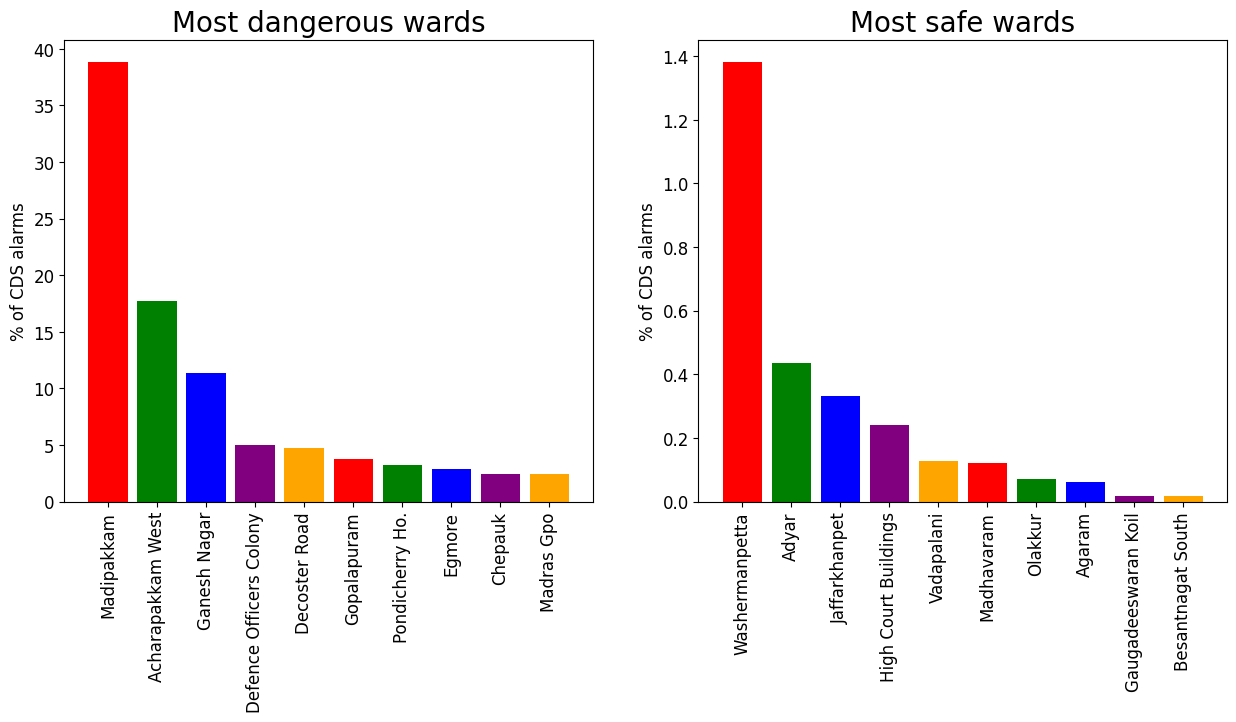

In [ ]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))
data = df1['ward'].value_counts(normalize=True).sort_values(ascending=False)
data1 = data.head(10)

axes1.bar(data1.index, data1*100, color=my_colors)
axes1.set_ylabel("% of CDS alarms")
axes1.set_xticklabels(data1.index, rotation=90)
axes1.set_title("Most dangerous wards")

data2 = data.tail(10)
axes2.bar(data2.index, data2*100, color=my_colors)
axes2.set_ylabel("% of CDS alarms")
axes2.set_xticklabels(data2.index, rotation=90)
axes2.set_title("Most safe wards")

plt.show()

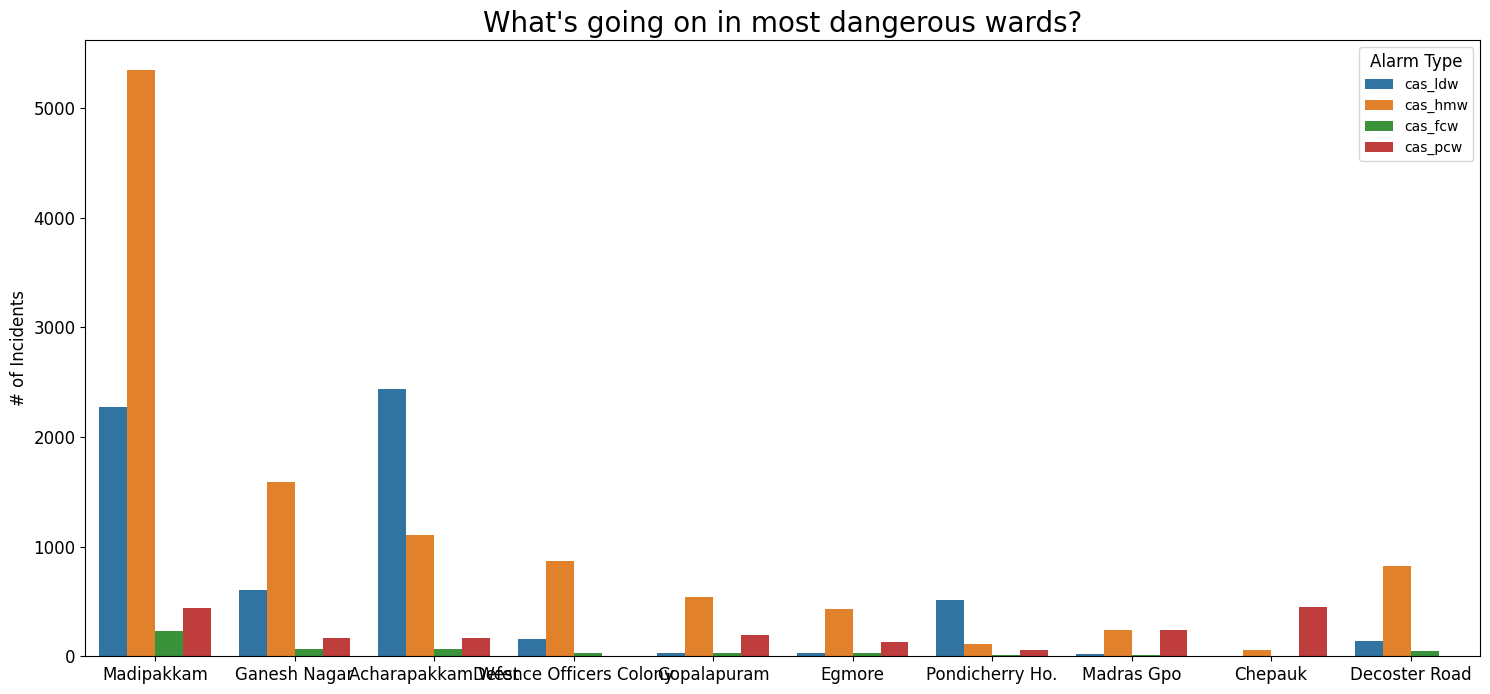

In [ ]:
fig, axes = plt.subplots(figsize=(18,8))
data = df1['ward'].value_counts(normalize=True).sort_values(ascending=False)
data = data.head(10)
ward_top = data.index

ward_top_data = df1[df1.ward.isin(ward_top)]
sns.countplot(x='ward', hue='Alert', data=ward_top_data, ax=axes)

axes.legend(title='Alarm Type')
axes.set_xlabel('')
axes.set_ylabel('# of Incidents')
axes.set_title('What\'s going on in most dangerous wards?')

plt.show()

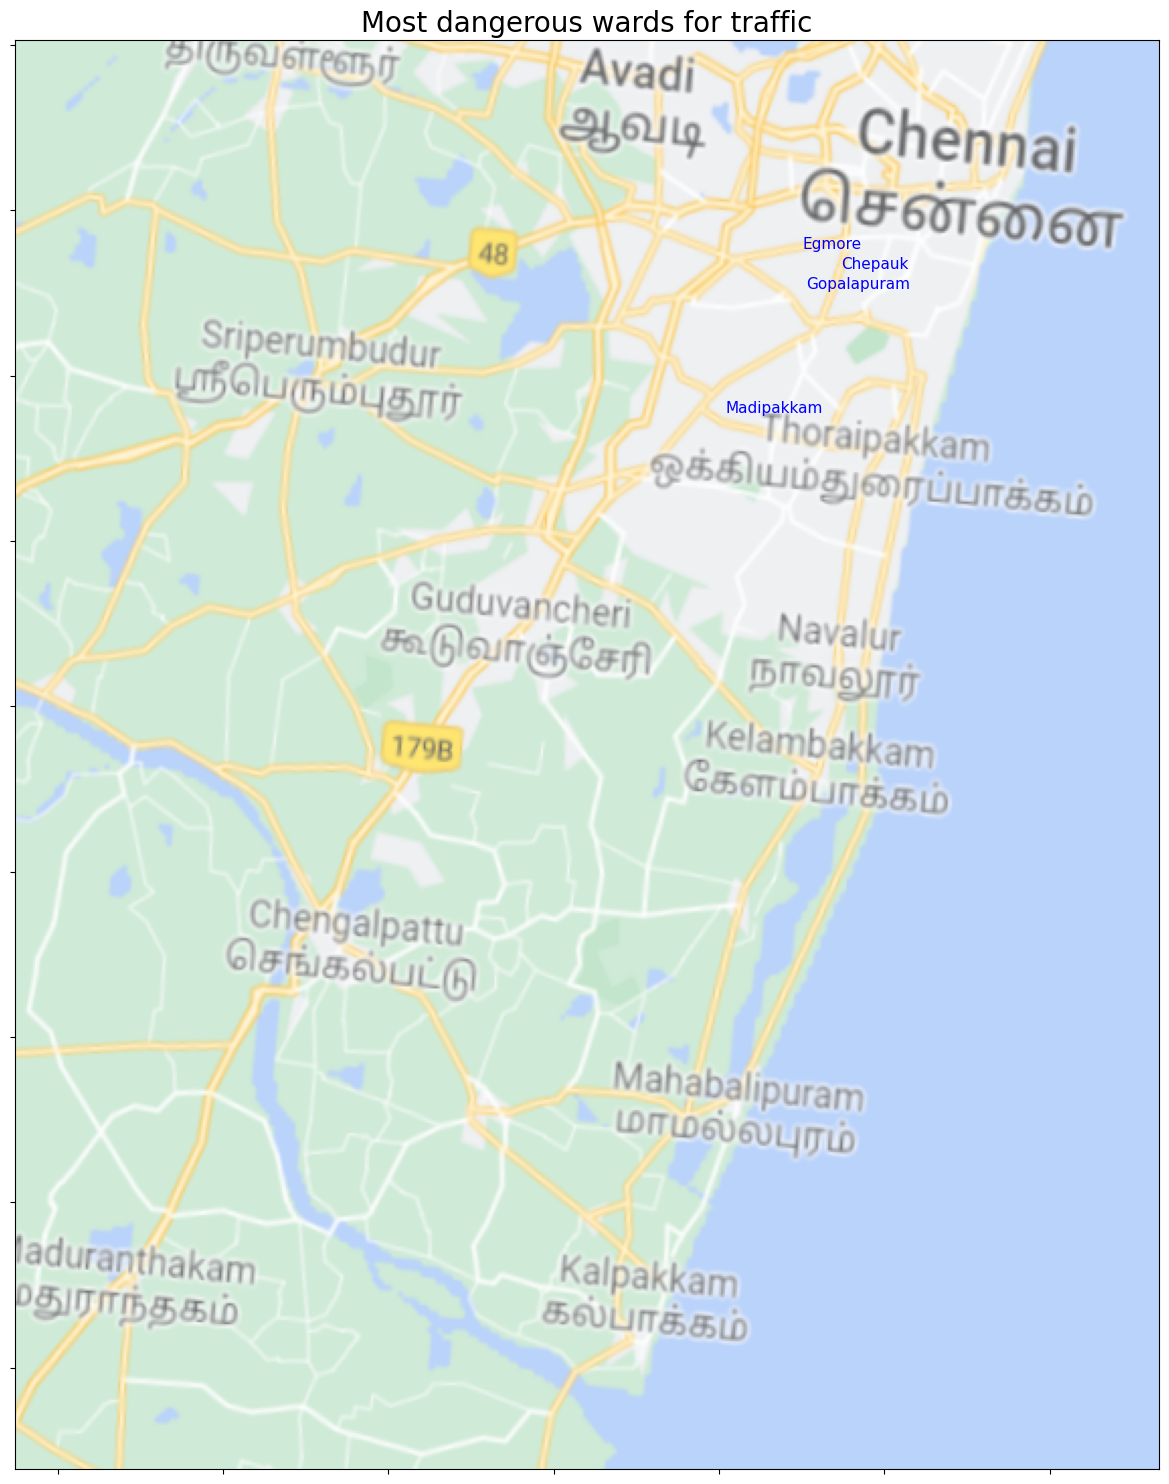

In [ ]:
fig, axes = plt.subplots(figsize=(15,15))
cmap = plt.get_cmap("jet")

data = bbmp_data[bbmp_data.WARD_NAME.isin(ward_top)]

axes.scatter( data.latitude, data.longitude, marker="v", s=300,
                   c='red', zorder=1)
axes.set_title("Most dangerous wards for traffic")

# Plot Bangalore map image
epsilon = 0.01
bound_box = [lon_min , lon_max +0.15,
             lat_min , lat_max +0.02]

axes.imshow(bangalore_map, extent=bound_box, alpha=0.7, zorder=0)

# Add names of wards as text
for _idx, _ward_data in data.iterrows():
    axes.text(_ward_data.longitude  - epsilon/2, _ward_data.latitude + epsilon/2,
              _ward_data.WARD_NAME, color='blue', fontsize=11)

axes.set_yticklabels([])
axes.set_xticklabels([])

plt.tight_layout()
plt.show()

In [ ]:
data.head()

WARD_NO    WARD_NAME  latitude  longitude
4    600005      Chepauk   13.0594    80.2789
6    600008       Egmore   13.0717    80.2556
48   600086  Gopalapuram   13.0472    80.2578
51   600091   Madipakkam   12.9725    80.2092